In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import tensorflow as tf
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_load_lib import get_from_STEAD, get_from_INSTANCE,  get_from_DiTing, get_instance_for_training,train_instance_plot

In [2]:
PickNet_model = tf.keras.models.load_model('../trained_models/PickNet_P_Focal_CB_BCE__0003.hdf5',compile=False)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1028: UserWarning: src.model.custom_layers is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '
2022-01-25 21:32:16.448232: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-25 21:32:16.539756: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-01-25 21:32:16.540540: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-25 21:32:16.543461: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 

In [3]:
STEAD_csv_file_name = '/mnt/GPT_disk/DL_datasets/STEAD/metadata_eq.csv.test.csv'
STEADDatasetPath = '/mnt/GPT_disk/DL_datasets/STEAD/waveforms.hdf5'
STEAD_csv = pd.read_csv(STEAD_csv_file_name)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


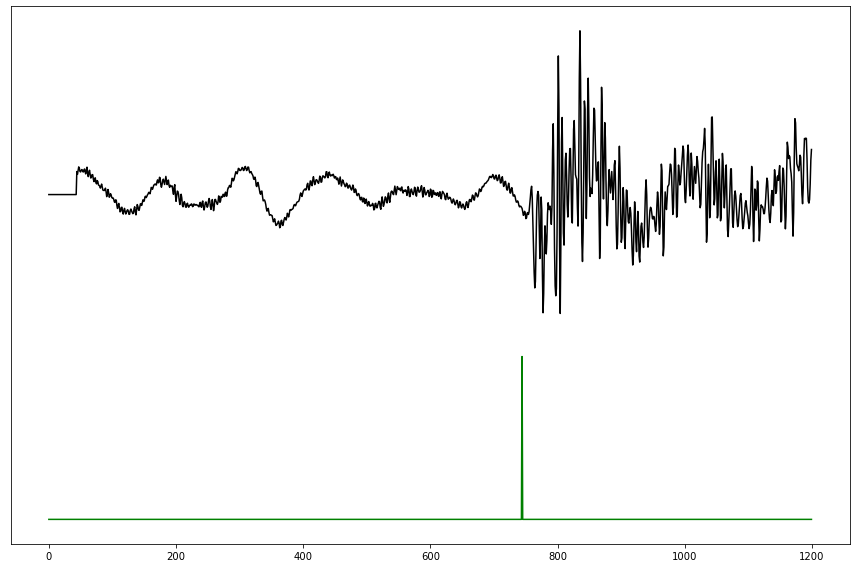

In [17]:
keys = list(STEAD_csv['trace_name'])
choice_key = np.random.choice(keys)
temp_data_X, temp_data_Y = get_instance_for_training(dataset='STEAD',
                                                     dataset_path=STEADDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     key = choice_key,
                                                     wave_type='P',
                                                     shift_max = 400)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/STEAD_P_vis.png')

In [18]:
np.max(np.abs(temp_data_X))

0.87245344112346379

In [6]:
temp_input = np.reshape(temp_data_X, [1,1200,1])
temp_input -= np.mean(temp_input)
temp_input /= np.max(np.abs(temp_input))
res = PickNet_model.predict(temp_input)

2022-01-25 21:32:27.479973: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-25 21:32:29.257100: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


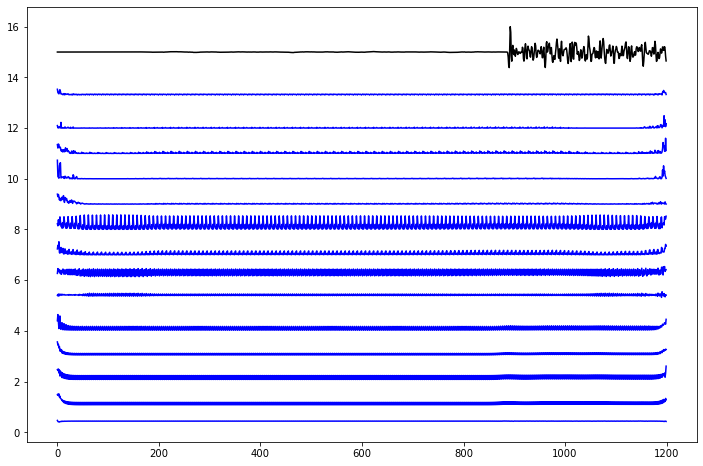

In [7]:
dup_num = 14
plt.figure(figsize=(12,8))
plt.plot(temp_input[0,:,0] + dup_num + 1,color='k')
for dup_idx in range(dup_num):
    plt.plot(res[dup_idx][0,:,0] + dup_idx,color='b')
plt.show()